<div>
<img src=https://www.whatbroketheinternet.com/wp-content/uploads/2020/05/technologyimage.jpg width="300">
</div>

## Alex Mini Project 1 
Linear Regression Algorithm



By Alex - started 19/05/20 Finished 23/05/20 (with suggested additions on 25/05/2020)

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

%matplotlib inline

CHOOSE DATA SET

In [2]:
bikes = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Module 3/bikeshare.csv')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
melb = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Module 3/melb_data.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


CHOOSE X AND Y

In [4]:
X = bikes['atemp']
Y = bikes['temp']
datatouse = bikes


#X = melb['Bathroom']
#Y = melb['Rooms']
#datatouse = melb

INITIALLY LOOK AT THE DATA

INIIIAL RESULTS
Mean of X :  0.4757751021347581
Mean of Y :  0.4969871684216586
 


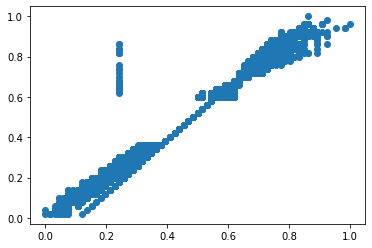

In [5]:
#xmean = bikes['temp'].mean()
#ymean = bikes['atemp'].mean()

xmean = X.mean()
ymean = Y.mean()
print("INIIIAL RESULTS")
print("Mean of X : ", xmean)
print("Mean of Y : ", ymean)
print(" ")
plt.scatter(X, Y) # extra stuff from Alex

CHOOSE INITIAL STARTING POINTS

In [6]:
minitial = 0.1 #choosing aslope that is too low a slope (eg if think slope should be 1 then choose 0.5)
maddfactor = 0.1
mtoofar=3 # Choosing aslope that is too HIGH a slope (eg if think slope should be 1 then choose 2)

ystart = -0.5 
yaddfactor = 0.1
ytoofar = 2 # matching x mean

A FEW FUNCTIONS

In [7]:
def calculateRsquaredB (df, Xc,Yc,Bzc, mc):
    ymean = np.mean(Yc)
    xmean = np.mean(Xc) 
    yhat = Bzc + (mc * Xc)
    SSresidual= pow((Yc - yhat),2)    
    SSresidualTotal=sum(SSresidual)
    SStot = sum(pow((Yc - ymean), 2))
    Rsquared = 1 - (SSresidualTotal /SStot )
    return(Rsquared)

In [8]:
def CalculateBNil (mc, yc, xmeanc):
    Beet = yc - (xmeanc * mc)
    return(Beet)

In [9]:
def StopBecauseR (OneAgo, ThisGo):
    if (OneAgo < ThisGo):
        Stop_as_R = False
    else:
         Stop_as_R = True
    return(Stop_as_R)
    #return(False)  # used to check impact of this function

MAIN CODE

In [10]:

### Run from here
BestR = -10000000
Bestm = 0
BestB = 0
Besti = 0
Bestj = 0
Previous_RMAX = -10000000

yuse = ystart
RList =[]
MLidt =[]
NewList =[]
ind =[]
totrunthrough = 0
j = 0
NotChangeY = True
Old_R = Previous_RMAX 

while NotChangeY: #j <20: #ChangeY == False: # moving the y start up and down 
    j += 1
    Old_R = -1000 ######
    if yuse > ytoofar:
        NotChangeY = False        
    yuse = yuse + yaddfactor
    mchange = minitial
    Bee = CalculateBNil (mchange,yuse, xmean)   
    i=1
    NotChangeM = True
    StopDuetoR = False
    while  NotChangeM: #i<20: #ChangeM == False: # moving the m around 

        i += 1
        totrunthrough += 1
        Tresult = calculateRsquaredB (datatouse,X, Y,Bee, mchange)
        Result1 = float(Tresult)
        mchange = mchange + maddfactor
        
        # beginning of R calculaitons
        StopDuetoR = StopBecauseR (Old_R, Result1) # beginning of R calculaitons
        Old_R = Result1
        if StopDuetoR:
            NotChangeM = False
            Old_R = Previous_RMAX 
        if mchange > mtoofar:
            NotChangeM = False
        # end of R Calculaitons
        print(" ")
        print("Result1 ",Result1, "yuse ",yuse,  "mchange ",mchange,"Bee ",Bee, "i(m) ",i, "j(y) ",j, "BestR ",BestR )
        if Result1 > BestR:
            print("------Besttttttttttt")
            BestR = Result1
            Bestb = Bee
            Bestm = mchange
            BestB = Bee
            Besty= yuse
            Besti = i
            Bestj = j


print("The END")


       

 
Result1  -21.53282399869236 yuse  -0.4 mchange  0.2 Bee  -0.4475775102134758 i(m)  2 j(y)  1 BestR  -10000000
------Besttttttttttt
 
Result1  -19.139358085118975 yuse  -0.4 mchange  0.30000000000000004 Bee  -0.4475775102134758 i(m)  3 j(y)  1 BestR  -21.53282399869236
------Besttttttttttt
 
Result1  -16.883930057963017 yuse  -0.4 mchange  0.4 Bee  -0.4475775102134758 i(m)  4 j(y)  1 BestR  -19.139358085118975
------Besttttttttttt
 
Result1  -14.766539917229546 yuse  -0.4 mchange  0.5 Bee  -0.4475775102134758 i(m)  5 j(y)  1 BestR  -16.883930057963017
------Besttttttttttt
 
Result1  -12.787187662917198 yuse  -0.4 mchange  0.6 Bee  -0.4475775102134758 i(m)  6 j(y)  1 BestR  -14.766539917229546
------Besttttttttttt
 
Result1  -10.945873295025002 yuse  -0.4 mchange  0.7 Bee  -0.4475775102134758 i(m)  7 j(y)  1 BestR  -12.787187662917198
------Besttttttttttt
 
Result1  -9.242596813553835 yuse  -0.4 mchange  0.7999999999999999 Bee  -0.4475775102134758 i(m)  8 j(y)  1 BestR  -10.94587329502

Result1  -5.126747199461952 yuse  -2.7755575615628914e-17 mchange  0.30000000000000004 Bee  -0.04757751021347584 i(m)  3 j(y)  5 BestR  0.927414351296061
 
Result1  -3.897920993058171 yuse  -2.7755575615628914e-17 mchange  0.4 Bee  -0.04757751021347584 i(m)  4 j(y)  5 BestR  0.927414351296061
 
Result1  -2.807132673075363 yuse  -2.7755575615628914e-17 mchange  0.5 Bee  -0.04757751021347584 i(m)  5 j(y)  5 BestR  0.927414351296061
 
Result1  -1.85438223951338 yuse  -2.7755575615628914e-17 mchange  0.6 Bee  -0.04757751021347584 i(m)  6 j(y)  5 BestR  0.927414351296061
 
Result1  -1.0396696923720294 yuse  -2.7755575615628914e-17 mchange  0.7 Bee  -0.04757751021347584 i(m)  7 j(y)  5 BestR  0.927414351296061
 
Result1  -0.3629950316516477 yuse  -2.7755575615628914e-17 mchange  0.7999999999999999 Bee  -0.04757751021347584 i(m)  8 j(y)  5 BestR  0.927414351296061
 
Result1  0.17564174264816745 yuse  -2.7755575615628914e-17 mchange  0.8999999999999999 Bee  -0.04757751021347584 i(m)  9 j(y)  5

Result1  -26.966264685105003 yuse  1.5000000000000002 mchange  0.2 Bee  1.4524224897865243 i(m)  2 j(y)  20 BestR  0.9633247470231415
 
Result1  -29.44915742009651 yuse  1.5000000000000002 mchange  0.30000000000000004 Bee  1.4524224897865243 i(m)  3 j(y)  20 BestR  0.9633247470231415
 
Result1  -32.64660023294236 yuse  1.6000000000000003 mchange  0.2 Bee  1.5524224897865244 i(m)  2 j(y)  21 BestR  0.9633247470231415
 
Result1  -35.386143423120075 yuse  1.6000000000000003 mchange  0.30000000000000004 Bee  1.5524224897865244 i(m)  3 j(y)  21 BestR  0.9633247470231415
 
Result1  -38.86637227931746 yuse  1.7000000000000004 mchange  0.2 Bee  1.6524224897865245 i(m)  2 j(y)  22 BestR  0.9633247470231415
 
Result1  -41.8625659246838 yuse  1.7000000000000004 mchange  0.30000000000000004 Bee  1.6524224897865245 i(m)  3 j(y)  22 BestR  0.9633247470231415
 
Result1  -45.62558082422599 yuse  1.8000000000000005 mchange  0.2 Bee  1.7524224897865246 i(m)  2 j(y)  23 BestR  0.9633247470231415
 
Result

ALEX REGRESSION - RESULTS
 
Iterations ran through  147
BestR  0.9633247470231415
Bestm  1.2
Bee  2.0524224897865246
Cross Y axis  -0.04757751021347584
  


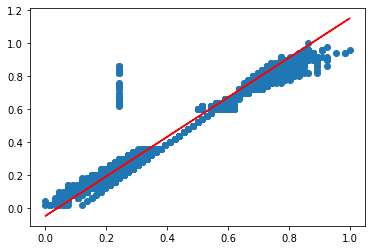

In [11]:
print("ALEX REGRESSION - RESULTS")
print(" ")
print("Iterations ran through ", totrunthrough)
print("BestR ",BestR)
print("Bestm ",Bestm)
print("Bee ",Bee)
print("Cross Y axis ",BestB)
print("  ")

printline=[]
for a in range(len(bikes)):
    printline = (Bestm * X) + BestB 
    
plt.plot(X,printline, color='r')
plt.scatter(X, Y) 
plt.show()


EXTRA FROM https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

In [12]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    count=0
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))
        count +=1

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b, count

In [13]:
m = Bestm*0.5
b  = BestB*0.5
learning_rate = 1

In [14]:
updated_weights_result = update_weights(m, b, X, Y, learning_rate)

In [15]:
print("M : mine is ", Bestm , " From UW is ",updated_weights_result[0])
print("B : mine is ", Bestb , " From UW is ",updated_weights_result[1])
print("Number of iterations : mine is ", totrunthrough , " From UW is ",updated_weights_result[2])

M : mine is  1.2  From UW is  0.8538351251796646
B : mine is  -0.04757751021347584  From UW is  0.4468329693883324
Number of iterations : mine is  147  From UW is  17379


In [16]:
m = Bestm
b  = BestB
learning_rate = 1

In [17]:
updated_weights_result = update_weights(m, b, X, Y, learning_rate)

In [18]:
print("M : mine is ", Bestm , " From UW is ",updated_weights_result[0])
print("B : mine is ", Bestb , " From UW is ",updated_weights_result[1])
print("Number of iterations : mine is ", totrunthrough , " From UW is ",updated_weights_result[2])

M : mine is  1.2  From UW is  1.1694000258354713
B : mine is  -0.04757751021347584  From UW is  -0.10030839806663226
Number of iterations : mine is  147  From UW is  17379


From above - changing m and B does not change the results

In [19]:
m = Bestm
b  = BestB
learning_rate = 2

In [20]:
updated_weights_result = update_weights(m, b, X, Y, learning_rate)

In [21]:
print("M : mine is ", Bestm , " From UW is ",updated_weights_result[0])
print("B : mine is ", Bestb , " From UW is ",updated_weights_result[1])
print("Number of iterations : mine is ", totrunthrough , " From UW is ",updated_weights_result[2])

M : mine is  1.2  From UW is  1.1388000516709424
B : mine is  -0.04757751021347584  From UW is  -0.1530392859197887
Number of iterations : mine is  147  From UW is  17379


In [22]:
m = Bestm
b  = BestB
learning_rate = 0.001

In [23]:
updated_weights_result = update_weights(m, b, X, Y, learning_rate)

In [24]:
print("M : mine is ", Bestm , " From UW is ",updated_weights_result[0])
print("B : mine is ", Bestb , " From UW is ",updated_weights_result[1])
print("Number of iterations : mine is ", totrunthrough , " From UW is ",updated_weights_result[2])

M : mine is  1.2  From UW is  1.1999694000258354
B : mine is  -0.04757751021347584  From UW is  -0.047630241101329
Number of iterations : mine is  147  From UW is  17379


In [25]:
m = Bestm #*0.5
b  = BestB#*0.5
learning_rate = 0.01

In [43]:
def update_weights_play(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = 1000 #len(X)
    count=0
    oldm = m
    oldb= b
    oldchangem = m
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))
        count +=1
         
        changem = oldm - m_deriv
        changeb = oldb - b_deriv
        #print(count,"m : ","%.4f" % m_deriv,"b ","%.4f" % b_deriv, "X ","%.4f" % X[i], " Y " ,  Y[i], "changem", "%.4f" % changem, "changeb", "%.4f" %changeb)
        
        #print(count,"m : ",m_deriv,"b ", b_deriv, "X ", X[i], " Y " ,  Y[i])
        
        #if ((oldchangem > 0)  & (changem < 0) or (oldchangem < 0)  & (changem > 0) ) :
       
            #print("M changed direction")
        oldm = m_deriv
        oldb = b_deriv
        oldchangem = changem
    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate
    #print("AAAA")
    
    return m, b, count
    


In [44]:
updated_weights_result_play = update_weights_play(m, b, X, Y, learning_rate)
print(updated_weights_result_play)

(0.7996358763870929, 0.035708238958777255, 1000)


In [45]:
print("M : mine is ", Bestm , " From UW is ",updated_weights_result_play[0])
print("B : mine is ", Bestb , " From UW is ",updated_weights_result_play[1])
print("Number of iterations : mine is ", totrunthrough , " From UW is ",updated_weights_result_play[2])

M : mine is  1.2  From UW is  0.7996358763870929
B : mine is  -0.04757751021347584  From UW is  0.035708238958777255
Number of iterations : mine is  147  From UW is  1000


M : mine is  1.2
B : mine is  -0.04757751021347584
m is  0.78509264712 b is  -0.007165599999999106
m is  0.7947589215637199 b is  0.034044827677210086
m is  0.7959435673470923 b is  0.03608553021122512
m is  0.7966483509291141 b is  0.03625048544863246
m is  0.7972358093462626 b is  0.03619219468479893
m is  0.7977540109525871 b is  0.03610024314229293
m is  0.7982166373747681 b is  0.03600767667540802
m is  0.7986310517083087 b is  0.03592149549096791
m is  0.7990027520808977 b is  0.035843021446937434
m is  0.799336352227638 b is  0.03577211488869398
 
 
ITERABLE REGRESSION - RESULTS
 
m  0.799336352227638
b  0.03577211488869398
  


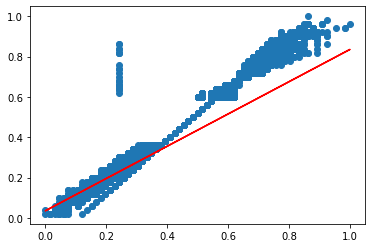

In [50]:
learning_rate = 0.5
m = 1
b = 1
print("M : mine is ", Bestm )
print("B : mine is ", Bestb )

for i in range(10):
    updated_weights_result_play = update_weights_play(m, b, X, Y, learning_rate)
    m = updated_weights_result_play[0]
    b = updated_weights_result_play[1]
    learning_rate = learning_rate * 0.9
    print("m is ",m, "b is ",b)

print(" ")
print(" ")
print("ITERABLE REGRESSION - RESULTS")
print(" ")
print("m ",m)
print("b ",b)
print("  ")

printline=[]
for a in range(len(bikes)):
    printline = (m * X) + b 
    
plt.plot(X,printline, color='r')
plt.scatter(X, Y) 
plt.show()

ALEX REGRESSION - RESULTS
 
Iterations ran through  147
BestR  0.9633247470231415
Bestm  1.2
Bee  2.0524224897865246
Cross Y axis  -0.04757751021347584
  


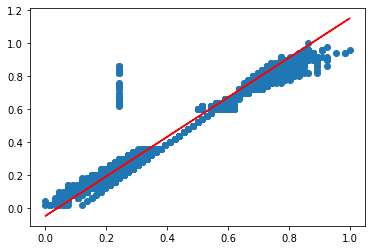

In [51]:
print("ALEX REGRESSION - RESULTS")
print(" ")
print("Iterations ran through ", totrunthrough)
print("BestR ",BestR)
print("Bestm ",Bestm)
print("Bee ",Bee)
print("Cross Y axis ",BestB)
print("  ")

printline=[]
for a in range(len(bikes)):
    printline = (Bestm * X) + BestB 
    
plt.plot(X,printline, color='r')
plt.scatter(X, Y) 
plt.show()